In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(1338, 7)

In [5]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

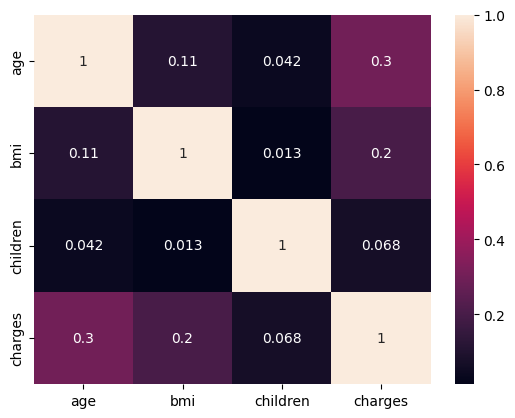

In [7]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [8]:
numeric_cols=df.select_dtypes(include=['number']).columns
categoric_cols=df.select_dtypes(include=["object"]).columns


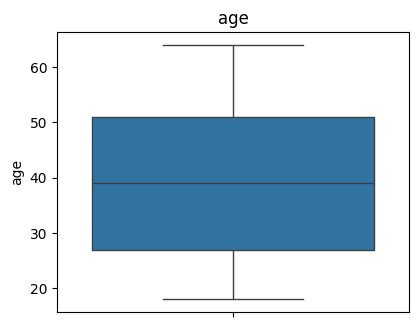

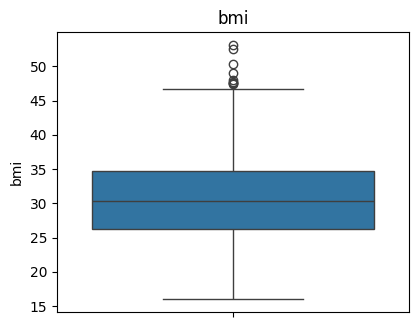

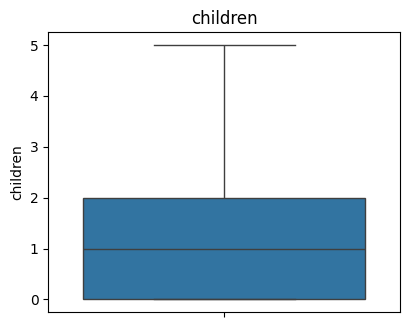

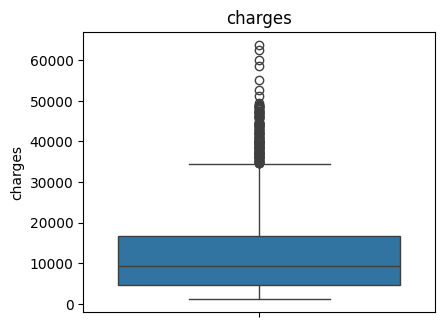

In [9]:
for i,col in enumerate(numeric_cols):
    plt.figure(figsize=(10,8))
    plt.subplot(2,2,i+1)
    sns.boxplot(df[col])
    plt.title(f"{col}")
    plt.show()

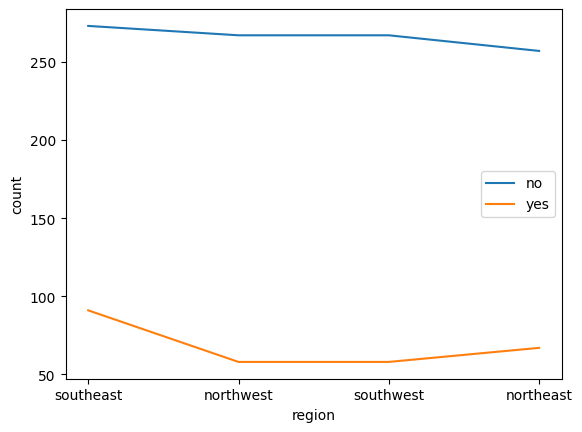

In [10]:
graph1=df.groupby('smoker')['region'].value_counts().reset_index()

sns.lineplot(data=graph1,x="region",y="count",hue="smoker")
plt.legend()
plt.show()

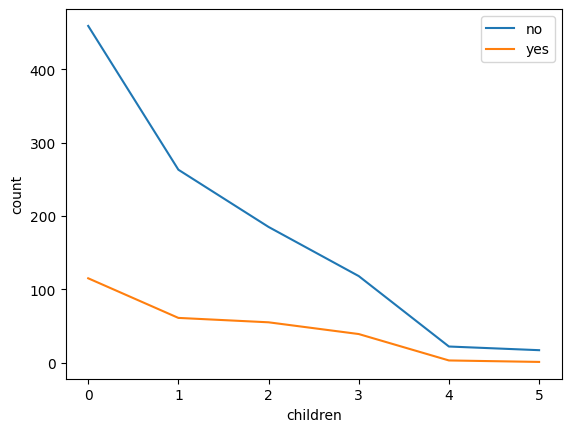

In [11]:
graph2=df.groupby('smoker')['children'].value_counts().reset_index()

sns.lineplot(data=graph2,x="children",y="count",hue="smoker")
plt.legend()
plt.show()

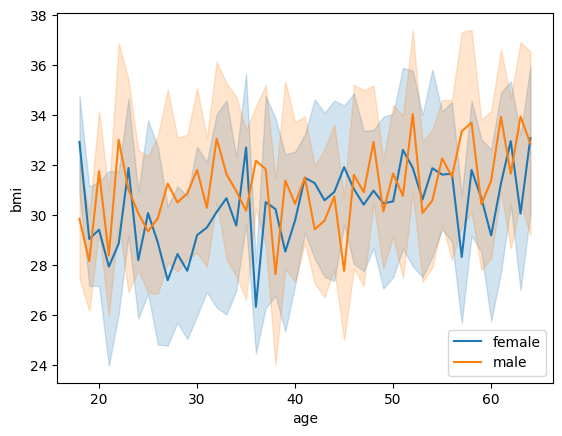

In [12]:
sns.lineplot(data=df,x="age",y="bmi",hue="sex")
plt.legend()
plt.show()

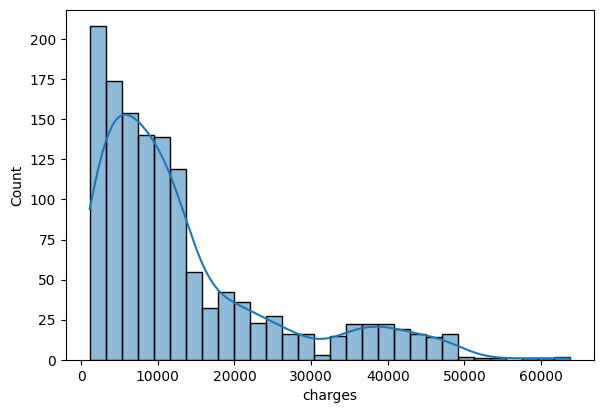

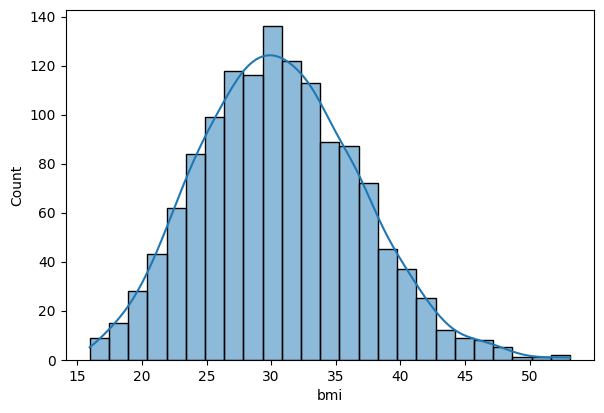

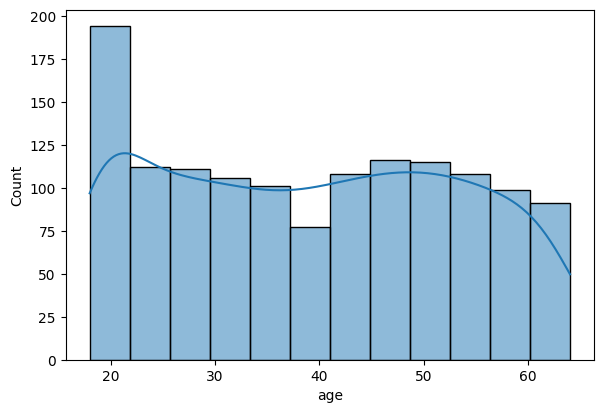

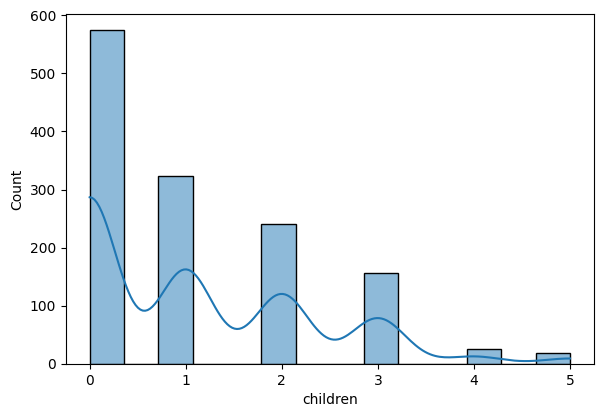

In [13]:
cols=['charges','bmi','age','children']


for i in range(4):
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,i+1)
    sns.histplot(data=df,x=cols[i],kde=True)
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,RobustScaler,OneHotEncoder
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression,RidgeCV,ElasticNetCV,LassoCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [15]:
numeric_cols[0:]

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

In [16]:
import math
def run_model(model):
    X=df.drop("charges",axis=1)
    y=df["charges"]
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=21)

    preprocessing = ColumnTransformer(transformers=[
("encode",OrdinalEncoder(),categoric_cols),
('scale',RobustScaler(),numeric_cols[0:3])
], remainder='passthrough')
    
    pip=Pipeline([
        ('preprocessing',preprocessing),
        ('model',model)
    ])
    pip.fit(X_train,y_train)
    y_pred=pip.predict(X_test)
    
    mse=mean_squared_error(y_test,y_pred)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)
    rmse=math.sqrt(mse)
   
    plt.figure(figsize=(5,3))
    sns.scatterplot(x=y_test,y=y_pred)
   
    plt.xlabel("Real charges")
    plt.ylabel("Predict charges")
    
    plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r') 
    plt.tight_layout()
    plt.show()
    

    return {'R2': r2, 'MSE': mse, 'MAE': mae, 'RMSE': rmse}

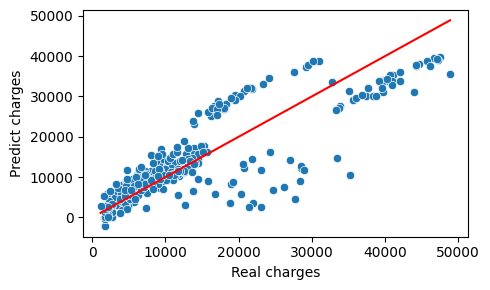

{'R2': 0.7138077795895594,
 'MSE': 38004842.75885715,
 'MAE': 4245.578472196017,
 'RMSE': 6164.8067900670785}

In [17]:
reg=LinearRegression()
run_model(reg)




****** RIDGE CV ******



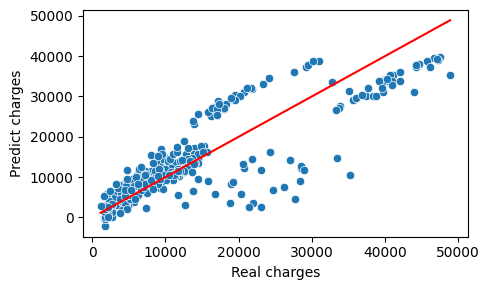

{'R2': 0.7138589281410097, 'MSE': 37998050.49646644, 'MAE': 4246.143648982126, 'RMSE': 6164.255875323999}

****** LASSO CV ******



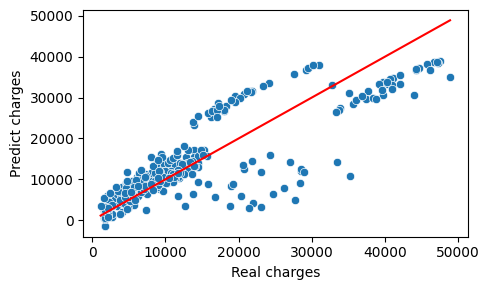

{'R2': 0.7156142015044256, 'MSE': 37764959.296154425, 'MAE': 4230.671097421349, 'RMSE': 6145.320113399661}

 * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 

 ****************************** ELASTICNET WITH DIFFERENT RATIOS ******************************

****** ELAStICNETCV l1_ratio: 0.25 ******



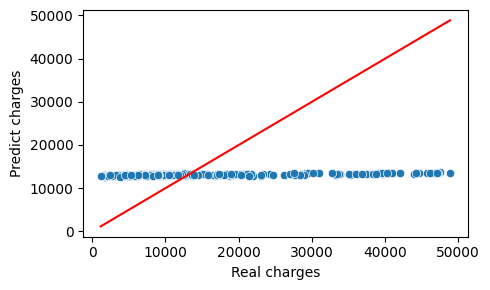

{'R2': 0.02140907782431123, 'MSE': 129951799.77007963, 'MAE': 8341.757814268023, 'RMSE': 11399.640335119333}

****** ELAStICNETCV l1_ratio: 0.5 ******



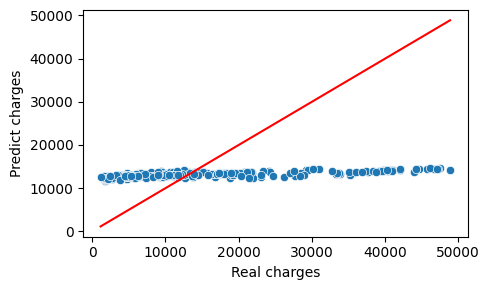

{'R2': 0.06779893937086556, 'MSE': 123791466.72135629, 'MAE': 8158.404779158533, 'RMSE': 11126.161365060112}

****** ELAStICNETCV l1_ratio: 0.75 ******



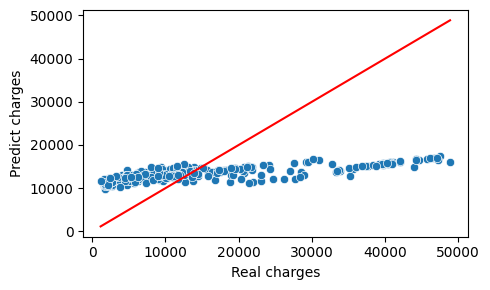

{'R2': 0.1792016345941989, 'MSE': 108997766.49846506, 'MAE': 7685.14976008329, 'RMSE': 10440.19954303868}

****** ELAStICNETCV l1_ratio: 1.0 ******



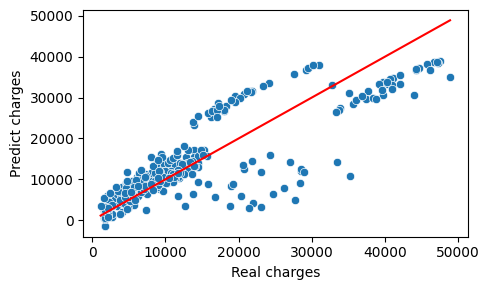

{'R2': 0.7156142015044256, 'MSE': 37764959.296154425, 'MAE': 4230.671097421349, 'RMSE': 6145.320113399661}


In [18]:
print("\n****** RIDGE CV ******\n")
print(run_model(RidgeCV(cv=5)))
print("\n****** LASSO CV ******\n")
print(run_model(LassoCV(cv=5)))
print("\n","* "*60)
print("\n","*"*30,"ELASTICNET WITH DIFFERENT RATIOS","*"*30)


for i in np.linspace(0,1,5):
    if i==0:
        continue
    else:
        print(f"\n****** ELAStICNETCV l1_ratio: {i} ******\n")
        print(run_model(ElasticNetCV(cv=5,l1_ratio=i)))


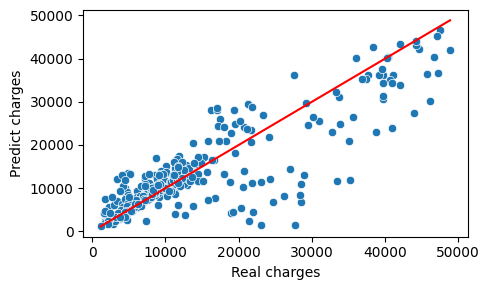

{'R2': 0.7367103777401507,
 'MSE': 34963496.49083415,
 'MAE': 3649.8947534656722,
 'RMSE': 5912.993868661978}

In [19]:
knn=KNeighborsRegressor()
run_model(knn)

In [20]:
params={
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
    'weights': ['uniform','distance'],
    'algorithm': ['ball_tree','kd_tree','brute'],
   
}

Fitting 5 folds for each of 60 candidates, totalling 300 fits


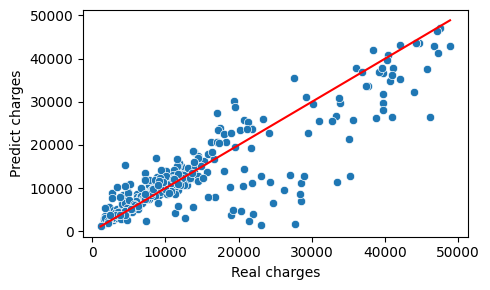

{'R2': 0.7626722646459961,
 'MSE': 31515892.540716793,
 'MAE': 3303.698170204406,
 'RMSE': 5613.901721683128}

In [21]:
grid=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params,cv=5,n_jobs=-1,scoring='r2',verbose=1)
run_model(grid)


In [22]:
print(grid.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}


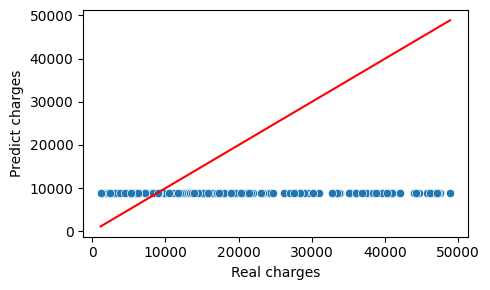

{'R2': -0.18164306131141306,
 'MSE': 156916070.87652534,
 'MAE': 8113.0248846942195,
 'RMSE': 12526.614501792787}

In [23]:
svr=SVR()
run_model(svr)

In [24]:
params_svr={
    'kernel':['rbf','linear','poly','sigmoid'],
    'degree': [1,2,3,4,5],
    'gamma': ['scale','auto'],
    'tol':[0.0001,0.001,0.01,0.1,1],
    'C':[0.01,0.1,1,2,5]
}

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


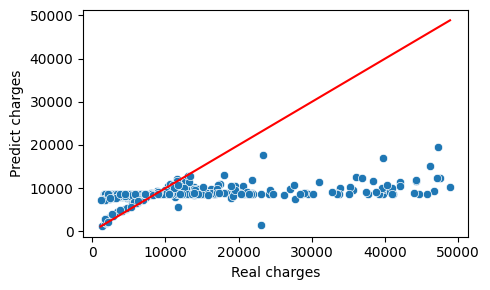

{'R2': -0.06290428623463495,
 'MSE': 141148177.2919252,
 'MAE': 7325.690975431308,
 'RMSE': 11880.579838203403}

In [25]:
grid_svr=GridSearchCV(estimator=SVR(),cv=5,verbose=1,param_grid=params_svr,scoring='r2',n_jobs=-1)
run_model(grid_svr)

In [26]:
grid_svr.best_params_

{'C': 5, 'degree': 5, 'gamma': 'scale', 'kernel': 'poly', 'tol': 0.1}

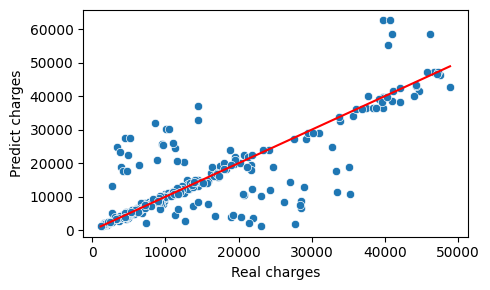

{'R2': 0.6366000829766321,
 'MSE': 48257624.491846584,
 'MAE': 3263.658681191045,
 'RMSE': 6946.770795977552}

In [27]:
tree=DecisionTreeRegressor()
run_model(tree)


In [28]:
params_tree={
    'criterion':['squared_error','friedman_mse','absolute_error','poisson'],
    'splitter':['best','random'],
    'max_depth': [1,2,3,4,5],
    'max_features':['log2','sqrt']
}

Fitting 5 folds for each of 80 candidates, totalling 400 fits


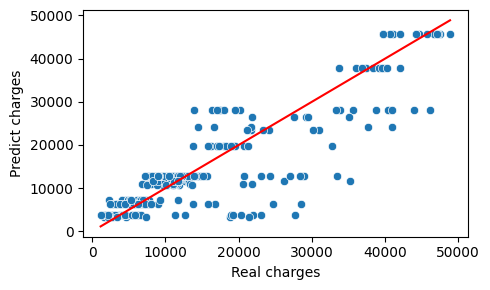

{'R2': 0.755982234214631,
 'MSE': 32404293.88940254,
 'MAE': 3500.079509729314,
 'RMSE': 5692.476955544268}

In [29]:
grid_tree=GridSearchCV(estimator=DecisionTreeRegressor(),cv=5,verbose=1,n_jobs=-1,param_grid=params_tree,scoring='r2')
run_model(grid_tree)

In [30]:
grid.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 6, 'weights': 'distance'}